
1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from sklearn.preprocessing import normalize

from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from studentsperformance',con=engine2)

# no need for an open connection, 
# as we're only doing a single query
engine2.dispose()


In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

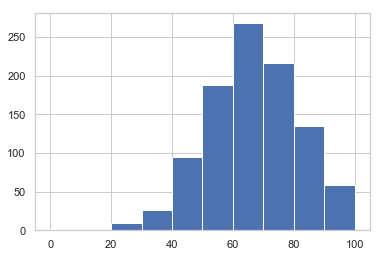

In [4]:
plt.hist(data['math score'])

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

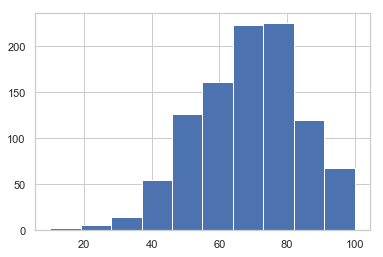

In [5]:
plt.hist(data['writing score'])

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

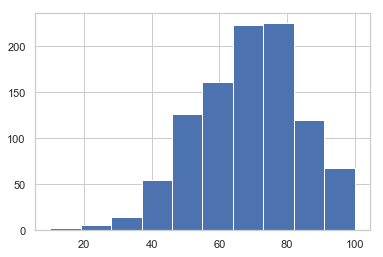

In [6]:
plt.hist(data['writing score'])

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

(array([  2.,   5.,  15.,  55., 126., 168., 239., 223., 107.,  60.]),
 array([ 35.66666667,  68.76666667, 101.86666667, 134.96666667,
        168.06666667, 201.16666667, 234.26666667, 267.36666667,
        300.46666667, 333.56666667, 366.66666667]),
 <a list of 10 Patch objects>)

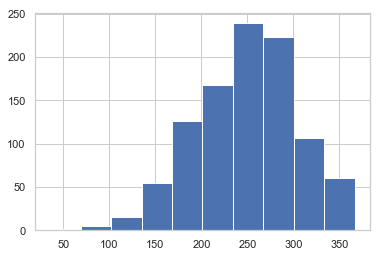

In [13]:
data['score'] = (data['math score']/3)+(data['reading score']/3)+(data['writing score']*3)
plt.hist(data['score'])

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [21]:
a = data.drop(columns=['math score','reading score','writing score'])
for i in a.keys()[:-1]:
    a = pd.concat([a, pd.get_dummies(a[i],drop_first=True)], axis=1)

In [22]:
a = a.drop(columns=['gender','race/ethnicity','parental level of education', 'lunch','test preparation course'])
a.corr()

,score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
score,1.000000,-0.258599,-0.078775,-0.015639,0.076519,0.103289,0.123469,-0.178115,0.120432,0.027855,-0.095335,0.259015,-0.300301
male,-0.258599,1.000000,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
group B,-0.078775,-0.028466,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
group C,-0.015639,-0.063368,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
group D,0.076519,0.030566,-0.288574,-0.407797,1.000000,-0.240402,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
group E,0.103289,0.020302,-0.195411,-0.276145,-0.240402,1.000000,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
bachelor's degree,0.123469,-0.011638,-0.019121,0.015682,-0.020556,0.013221,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
high school,-0.178115,0.037952,0.069093,0.007977,-0.042118,-0.039494,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446
master's degree,0.120432,-0.046188,-0.056363,0.001630,0.072793,-0.003180,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,-0.027095,0.009933
some college,0.027855,-0.004460,-0.036203,-0.015872,0.042347,0.023153,-0.197647,-0.266799,-0.135305,1.000000,-0.252312,0.006146,0.019490


It seems that the highest correlation with the score is test preparation, where no test preparation correlates negatively with the score by 0.3. This is followed by the lunch type, gender, parental level of education, and race, respectively.